# Concentration of the norm for random vectors
Based on section 3.1 of Vershynin's 'High Dimensional Probability'

Charlotte Aten (charlotte.aten@rochester.edu) 2020

Thanks to Sevak Mkrtchyan for suggesting some of the projects in section 3.1 of this notebook.

In [30]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

## 1. Making random vectors

In order to work with random vectors we're going to need to create examples of them.

We first do this by using the distributions implemented in numpy.

Later we will use real-world data to produce examples.

In [15]:
print('We first create a random number generator with numpy.\n')
rng = np.random.default_rng()

print('We can use this random number generator to make a random vector with 13 components coming from the standard normal distribution with mean 0 and variance 1.\n')
x = rng.standard_normal(13)

print('We display the components of this vector.')
print(x)
print()

print('We can also make a random vector of dimension 7 whose components are sampled from the normal distribution with mean 2.3 and variance 1.1.\n')
y = rng.normal(2.3,1.1,7)

print('We display the components of this vector.')
print(y)
print()

print('We can sample components for our vectors from other distributions, as well.\n')
print('Here we create and display a random vector of dimension 5 whose components are sampled from the Wald, or Inverse Gaussian, distribution with mean 2.4.')
z = rng.wald(2.4,1,5)
print(z)

We first create a random number generator with numpy.

We can use this random number generator to make a random vector with 13 components coming from the standard normal distribution with mean 0 and variance 1.

We display the components of this vector.
[ 0.02665068  0.81638845  0.91021252 -0.6717217  -0.55340911  1.09445412
  0.21593961 -0.23691689  0.85683831  0.80678899  1.05738337  0.39350835
  0.96532737]

We can also make a random vector of dimension 7 whose components are sampled from the normal distribution with mean 2.3 and variance 1.1.

We display the components of this vector.
[2.47983352 1.83302933 3.40827548 0.07455127 0.98069831 1.93916104
 1.91668912]

We can sample components for our vectors from other distributions, as well.

Here we create and display a random vector of dimension 5 whose components are sampled from the Wald, or Inverse Gaussian, distribution with mean 2.4.
[1.47264434 0.50012352 0.69528298 0.52127109 0.67189622]


### 1.1 Projects, exercises, and comments on making random vectors

Exercise: Create a random vector with 21 components coming from the standard normal distribution.

Exercise: Create a random vector with 11 components coming from the normal distribution with mean -2 and variance 1.3.

Documentation of the distributions available in numpy can be found [here](https://numpy.org/doc/stable/reference/random/generator.html).

Exercise: Find out what the second parameter to the Wald distribution in the previous example is by using the documentation.

Exercise: Create and display a vector whose components are generated according to another distribution available in numpy.

So far our random vectors have been numpy arrays. Let's create a class which represents a random vector and carries some of the methods we would like to use on random vectors.

## 2. A class for random vectors

We create a class which will represent our conception of a random vector.

There is nothing stopping us from defining a laundry-list of functions which operate on numpy vectors and going from there, but using the object-oriented approach helps keep us organized and distinguish what we add from what already exists in numpy.

In [22]:
class RandomVector:
    """
    A random vector.
    
    Attributes:
        components (numpy.ndarray): The components of the vector.
        dim (int): The dimension in which the vector lies.
    """
    
    def __init__(self,dim,distribution=lambda dim: np.random.default_rng().standard_normal(dim)):
        """        
        Args:
            dim (int): The dimension in which the vector lies.
            distribution (function): The distribution according to which the vector is generated.
                This function should create a numpy array with `dim` many entries.
                The list of available distributions in numpy can be found here:
                https://numpy.org/doc/stable/reference/random/generator.html
                These distributions can be passed in as pure (lambda) functions.
                See examples below.
        """
        
        # Demand that `dim` is a natural number.
        assert dim>0 and type(dim) is int
        self.components = distribution(dim)
        # Let the vector keep track of its dimension. (This is the same as its length.)
        self.dim = dim

    def __repr__(self):
        """
        Make it so that printing the vector returns basic information about it.
        In order to see the components of a random vector `x` use `print(x.components)`.
        
        Returns:
            str: The basic information on the vector.
        """

        return 'a {}-dimensional random vector (id: {})'.format(self.dim,id(self))

    def mean(self):
        """
        Compute the mean of the random vector by taking the mean of its components.
        
        Returns:
            numpy.float64: The computed mean of the vector.
        """
        
        return self.components.mean()
    
    def norm_squared(self):
        """
        Compute the Euclidean norm squared of the vector, which is the sum of the squares of the entries.
        
        Returns:
            numpy.float64: The square of the norm of the vector.
        """

        return sum(t**2 for t in self.components)

In [23]:
print('Examples of the `RandomVector` class.\n')

print('Create a random vector `x` in 10 dimensions.')
x = RandomVector(10)
print()

print('Have `x` give us information about itself.')
print(x)
print()

print('Check the dimension of `x`.')
print(x.dim)
print()

print('View the components of `x`.')
print(x.components)
print()

print('Note that the dimension is the same as the length of the component array.')
print(x.dim)
print(len(x.components))
print()

print('Check the mean of `x` as computed from its components.')
print(x.mean())
print()

print('Create another random vector in 10 dimensions.')
y = RandomVector(10)
print()

print('Note that `x` and `y` are distinct.')
print(x)
print(y)
print()

print('We can also specify the mean and variance of our random vector.')
print('Create a 4-dimensional random vector of mean 7 and variance 1.2.')
z = RandomVector(4,lambda dim: rng.normal(7,1.2,dim))
print()

print('See some basic information on `z`.')
print(z)
print()

print('Show the computed mean of `z`.')
print('Note that this is in general distinct from the specified mean.')
print(z.mean())
print()

print('Compute the norm squared of `z`.')
print(z.norm_squared())

Examples of the `RandomVector` class.

Create a random vector `x` in 10 dimensions.

Have `x` give us information about itself.
a 10-dimensional random vector (id: 140096270474784)

Check the dimension of `x`.
10

View the components of `x`.
[-0.43178233 -0.12170968  1.39755446 -0.5193011  -0.85309362  1.01814916
 -0.12719281 -0.26610793  1.30165307 -0.27858438]

Note that the dimension is the same as the length of the component array.
10
10

Check the mean of `x` as computed from its components.
0.11195848413392788

Create another random vector in 10 dimensions.

Note that `x` and `y` are distinct.
a 10-dimensional random vector (id: 140096270474784)
a 10-dimensional random vector (id: 140096270473104)

We can also specify the mean and variance of our random vector.
Create a 4-dimensional random vector of mean 7 and variance 1.2.

See some basic information on `z`.
a 4-dimensional random vector (id: 140096270422896)

Show the computed mean of `z`.
Note that this is in general distinct

### 2.1 Projects, exercises, and comments on a class for random vectors

Now that we have our fancy new class for creating random vectors we can build on it for future projects.

Exercise: Add a method to RandomVector which computes the variance of the vector directly from its components.

Exercise: Add a method to RandomVector which computes the L_p norm of the vector for any p.

Project: In analogy with RandomVector create a RandomMatrix class whose components can either come from inputted data or be sampled from a distribution. Make use of existing methods for matrix algebra in numpy to multiply your RandomMatrices and RandomVectors.

## 3. Concentration of the norm

In [31]:
def square_norm_expectation(m,dim,distribution=lambda dim: np.random.default_rng().standard_normal(dim)):
    """
    Given a random vector of dimension `dim` whose entries are random variables with zero means and unit variances we are told that the expected value of the norm squared is `dim`.
    This function tests this claim.

    Args:
        m (int): The number of vectors we should use in our test.
        dim (int): The dimension of the ambient real vector space.
        distribution (str): The distribution according to which the vector is generated.

    Returns:
        numpy.float64: The approximate expectation of the norm squared of such a random vector.
    """
    
    # Create an immutable set of `m` random vectors in the appropriate space.
    vectors = frozenset(RandomVector(dim,distribution) for i in range(m))
    # Make a tuple out of the norms squared of these vectors.
    norms_squared = tuple(x.norm_squared() for x in vectors)
    # Compute the average (counting measure expectation) and return it.
    return sum(norms_squared)/m

Examples of the `square_norm_expectation` function.

Compute the approximate expectation of the norm squared of a random vector with zero means and unit variances from the normal distribution.
In this case we use 10000 samples in a 17 dimensional space.
17.17254450446937

We plot the computed expectation obtained from 1000 samples for various choices of `dim` from 1 to 30.


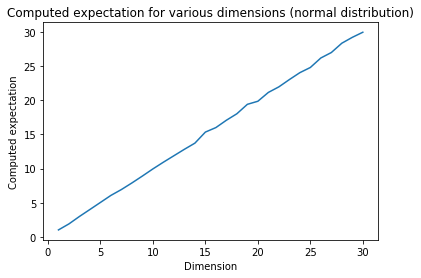

We can also use a different mean, say 10 rather than 0.


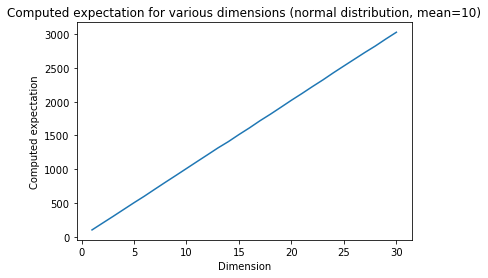

Other distributions also give different results.


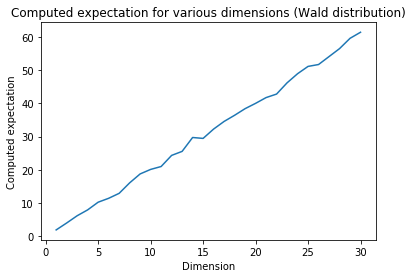

In [32]:
print('Examples of the `square_norm_expectation` function.\n')

print('Compute the approximate expectation of the norm squared of a random vector with zero means and unit variances from the normal distribution.')
print('In this case we use 10000 samples in a 17 dimensional space.')
print(square_norm_expectation(1000,17))
print()

print('We plot the computed expectation obtained from 1000 samples for various choices of `dim` from 1 to 30.')
x = np.arange(1,31)
y = np.array(tuple(square_norm_expectation(1000,dim) for dim in range(1,31)))
plt.title("Computed expectation for various dimensions (normal distribution)") 
plt.xlabel("Dimension") 
plt.ylabel("Computed expectation") 
plt.plot(x,y) 
plt.show()

print('We can also use a different mean, say 10 rather than 0.')
x = np.arange(1,31)
y = np.array(tuple(square_norm_expectation(1000,dim,lambda dim: rng.normal(10,size=dim)) for dim in range(1,31)))
plt.title("Computed expectation for various dimensions (normal distribution, mean=10)") 
plt.xlabel("Dimension") 
plt.ylabel("Computed expectation") 
plt.plot(x,y) 
plt.show()

print('Other distributions also give different results.')
x = np.arange(1,31)
y = np.array(tuple(square_norm_expectation(1000,dim,lambda dim: rng.wald(1,1,dim)) for dim in range(1,31)))
plt.title("Computed expectation for various dimensions (Wald distribution)") 
plt.xlabel("Dimension") 
plt.ylabel("Computed expectation") 
plt.plot(x,y) 
plt.show()

### 3.1 Projects, exercises, and comments on concentration of the norm.

Exercise: Compute the expectation of the norm squared $$||X||^2=X_1^2+\cdots+X_n^2$$ of a random vector $X=(X_1,\dots,X_n)$ in $n$ dimensions whose components are random variables with mean $\mu$ and variance $\sigma$. Explain how this formula agrees with our experimental plots above.

Project: Explain the variance of the square norm expectation. Why is the line in the second example so much strighter?

Project: Normalize the square norm of a random vector by its dimension and compute the standard deviation of this as the dimension goes to infinity.

Project: Plot random vectors in two dimensions normalized by their length. Look at the distribution of the distances between successive points on the circle.

Copyright (c) 2020 TRIPODS/GradStemForAll 2020 Team